In [43]:
import pandas as pd
import model
import argparse
from tensorflow.keras.callbacks import History, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing
from matplotlib import pyplot as plt
import os
import numpy as np

In [44]:
file_path = "training_set.csv"
df = pd.read_csv(file_path)
data = df.values


In [45]:
df.head()

,day,month,hour,minute,load
0,0,0,0.0,0.0,66.32
1,0,0,0.0,15.0,61.80
2,0,0,0.0,30.0,61.96
3,0,0,0.0,45.0,61.28
4,0,0,1.0,0.0,61.14


In [46]:
Y = df["load"].values.reshape(-1,1) # training label
X = df[df.columns[:-1]].values.reshape(-1,4)  # training data

In [47]:
Y

array([[66.32],
       [61.8 ],
       [61.96],
       ...,
       [91.32],
       [90.72],
       [90.63]])

In [48]:
X

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 15.],
       [ 0.,  0.,  0., 30.],
       ...,
       [ 6., 11., 23., 15.],
       [ 6., 11., 23., 30.],
       [ 6., 11., 23., 45.]])

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.15, shuffle=True)

In [51]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam

In [52]:
model = Sequential()

model.add(Dense(300,
                activation='relu',
                input_shape = X_train.shape[1:]))

model.add(Dense(90,
                activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(30,
                activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7,
                activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,
                activation='linear'))



In [53]:
epochs = 500
checkpoint_file = "checkpoint.hdf5"
model_file = "model.h5"

In [54]:
optimizer = Adam(0.001)
model.compile(optimizer=optimizer,
              loss='mse')

In [ ]:
hist = model.fit(X_train, y_train,validation_split=0.15,
          batch_size=64, epochs=epochs,shuffle=False)
model.save("model/{}".format(model_file))

Train on 5816 samples, validate on 1027 samples
Epoch 1/500
5816/5816 [==============================] - 1s 184us/sample - loss: 1854.5017 - val_loss: 414.6550
Epoch 2/500
5816/5816 [==============================] - 0s 72us/sample - loss: 775.2026 - val_loss: 340.2173
Epoch 3/500
5816/5816 [==============================] - 0s 43us/sample - loss: 679.7247 - val_loss: 304.4304
Epoch 4/500
5816/5816 [==============================] - 0s 66us/sample - loss: 634.1148 - val_loss: 266.8295
Epoch 5/500
5816/5816 [==============================] - 0s 39us/sample - loss: 630.6493 - val_loss: 217.8166
Epoch 6/500
5816/5816 [==============================] - 0s 64us/sample - loss: 601.9532 - val_loss: 255.7549
Epoch 7/500
5816/5816 [==============================] - 0s 45us/sample - loss: 587.7479 - val_loss: 241.8790
Epoch 8/500
5816/5816 [==============================] - 0s 46us/sample - loss: 579.5597 - val_loss: 200.8241
Epoch 9/500
5816/5816 [==============================] - 0s 46us/sampl

5816/5816 [==============================] - 0s 77us/sample - loss: 444.0779 - val_loss: 170.0049
Epoch 75/500
5816/5816 [==============================] - 0s 53us/sample - loss: 434.7308 - val_loss: 158.7476
Epoch 76/500
5816/5816 [==============================] - 0s 64us/sample - loss: 443.6824 - val_loss: 129.4058
Epoch 77/500
5816/5816 [==============================] - 0s 56us/sample - loss: 439.1832 - val_loss: 195.8619
Epoch 78/500
5816/5816 [==============================] - 0s 51us/sample - loss: 452.5882 - val_loss: 144.8605
Epoch 79/500
5816/5816 [==============================] - 0s 46us/sample - loss: 442.2579 - val_loss: 120.0954
Epoch 80/500
5816/5816 [==============================] - 0s 50us/sample - loss: 445.8491 - val_loss: 160.9174
Epoch 81/500
5816/5816 [==============================] - 0s 55us/sample - loss: 454.6985 - val_loss: 144.3185
Epoch 82/500
5816/5816 [==============================] - 0s 45us/sample - loss: 431.3551 - val_loss: 142.4048
Epoch 83/500
5

Epoch 148/500
5816/5816 [==============================] - 0s 42us/sample - loss: 308.7760 - val_loss: 69.2286
Epoch 149/500
5816/5816 [==============================] - 0s 47us/sample - loss: 304.6113 - val_loss: 50.9272
Epoch 150/500
5816/5816 [==============================] - 0s 58us/sample - loss: 306.3732 - val_loss: 53.8015
Epoch 151/500
5816/5816 [==============================] - 0s 40us/sample - loss: 304.6843 - val_loss: 46.7492
Epoch 152/500
5816/5816 [==============================] - 0s 51us/sample - loss: 312.7543 - val_loss: 43.4799
Epoch 153/500
5816/5816 [==============================] - 0s 47us/sample - loss: 305.1505 - val_loss: 44.6199
Epoch 154/500
5816/5816 [==============================] - 0s 51us/sample - loss: 296.3698 - val_loss: 53.5952
Epoch 155/500
5816/5816 [==============================] - 0s 41us/sample - loss: 296.4975 - val_loss: 61.2913
Epoch 156/500
5816/5816 [==============================] - 0s 41us/sample - loss: 301.0511 - val_loss: 52.5322
E

Epoch 222/500
5816/5816 [==============================] - 0s 60us/sample - loss: 211.7416 - val_loss: 51.8264
Epoch 223/500
5816/5816 [==============================] - 0s 54us/sample - loss: 210.9364 - val_loss: 49.7031
Epoch 224/500
5816/5816 [==============================] - 0s 47us/sample - loss: 216.4982 - val_loss: 53.3830
Epoch 225/500
5816/5816 [==============================] - 0s 61us/sample - loss: 210.1067 - val_loss: 45.7351
Epoch 226/500
5816/5816 [==============================] - 0s 51us/sample - loss: 203.5256 - val_loss: 39.3672
Epoch 227/500
5816/5816 [==============================] - 0s 56us/sample - loss: 204.8001 - val_loss: 54.1208
Epoch 228/500
5816/5816 [==============================] - 0s 52us/sample - loss: 198.9812 - val_loss: 50.9378
Epoch 229/500
5816/5816 [==============================] - 0s 45us/sample - loss: 205.8291 - val_loss: 52.8170
Epoch 230/500
5816/5816 [==============================] - 0s 52us/sample - loss: 202.2580 - val_loss: 43.8198
E

Epoch 296/500
5816/5816 [==============================] - 0s 54us/sample - loss: 173.6973 - val_loss: 42.4557
Epoch 297/500
5816/5816 [==============================] - 0s 64us/sample - loss: 166.9572 - val_loss: 35.0552
Epoch 298/500
5816/5816 [==============================] - 0s 64us/sample - loss: 164.9122 - val_loss: 42.3922
Epoch 299/500
5816/5816 [==============================] - 0s 42us/sample - loss: 163.1634 - val_loss: 40.4010
Epoch 300/500
5816/5816 [==============================] - 0s 58us/sample - loss: 173.9600 - val_loss: 46.3961
Epoch 301/500
5816/5816 [==============================] - 0s 62us/sample - loss: 163.2982 - val_loss: 45.6842
Epoch 302/500
5816/5816 [==============================] - 0s 64us/sample - loss: 164.8453 - val_loss: 36.5832
Epoch 303/500
5816/5816 [==============================] - 0s 51us/sample - loss: 165.0976 - val_loss: 32.6178
Epoch 304/500
5816/5816 [==============================] - 0s 52us/sample - loss: 166.1121 - val_loss: 36.4551
E

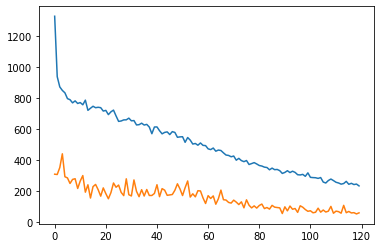

In [41]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [39]:
predicted_value = model.predict(X_test)
predicted_value

array([[60.754166]], dtype=float32)

In [31]:
y_test

array([[77.48],
       [55.54],
       [72.22],
       ...,
       [83.92],
       [59.34],
       [76.24]])

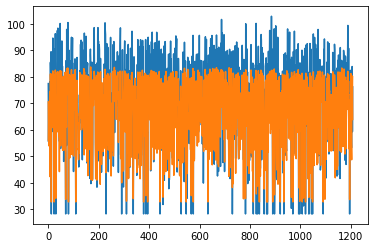

In [22]:
plt.plot(range(len(y_test)),y_test)
plt.plot(range(len(predicted_value)),predicted_value)
plt.show()